In [48]:
import torch
import torch.nn as nn

import random
from PIL import Image

from torchvision import transforms

from captcha.image import ImageCaptcha

In [49]:
from model.attention_ocr import OCR
from utils.dataset import CaptchaDataset
from utils.train_util import train_batch, eval_batch
from utils.tokenizer import Tokenizer

In [50]:
img_width = 350
img_height = 32
max_len = 30

nh = 512

device = 'cpu'

In [51]:
chars = list(' 1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
gen = ImageCaptcha(img_width, img_height)
n_chars = 20

In [52]:
tokenizer = Tokenizer(chars)
model = OCR(img_width, img_height, nh, tokenizer.n_token,
                max_len + 1, tokenizer.SOS_token, tokenizer.EOS_token).to(device=device)


Model feature size: 1 41


In [53]:
model.load_state_dict(torch.load('C:/Users/HP/Desktop/attention-ocr/model_120.pth', map_location = torch.device('cpu')))

<All keys matched successfully>

In [54]:
img_trans = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=(0.229, 0.224, 0.225)),
])


Hình ảnh input:


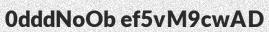

In [59]:
content = [random.randrange(0, len(chars)) for _ in range(n_chars)]
s = ''.join([chars[i] for i in content])
d = gen.generate(s)
image = Image.open(r"C:\Users\HP\Desktop\data\train\0dddNoOb ef5vM9cwAD_6750.jpg")
print("Hình ảnh input:")
image

In [61]:
model.eval()
with torch.no_grad():
    predict = model(img_trans(image).unsqueeze(0))
    
return_text = tokenizer.translate(predict.squeeze(0).argmax(1))
print("Text có được khi đưa ảnh qua model:    ", end="")
for i in return_text:
    if i != '-':
        print(i,end="")
# print(rst)

Text có được khi đưa ảnh qua model:    0dddNoOb ef5vM9cwADAD